In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('dataset.csv')
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0


In [3]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [4]:
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

# Data Preprocessing/Sanity 

Date time format correction

In [5]:
df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d')

In [6]:
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['posting_date'] = pd.to_datetime(df['posting_date'])

In [7]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-01-25,20200126,2020-02-10,USD,RV,1.0,NaN,54273.28,2020-01-26,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-07-22,20190722,2019-08-11,USD,RV,1.0,NaN,79656.60,2019-07-22,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-14,20190914,2019-09-29,USD,RV,1.0,NaN,2253.86,2019-09-14,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-03-30,20200330,2020-04-10,CAD,RV,1.0,NaN,3299.70,2020-03-31,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-13,20191113,2019-11-28,USD,RV,1.0,NaN,33133.29,2019-11-13,NAH4,1.930148e+09,0


In [8]:
df.shape

(50000, 19)

In [9]:
test=df[df['clear_date'].isnull()]
df=df[df['clear_date'].isnull()==False]

In [10]:
test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-03-30,20200330,2020-04-10,CAD,RV,1.0,NaN,3299.70,2020-03-31,CA10,2.960623e+09,1
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-03-18,20200319,2020-04-03,USD,RV,1.0,NaN,11173.02,2020-03-19,NAA8,1.930659e+09,1
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-06,20200311,2020-03-26,USD,RV,1.0,NaN,3525.59,2020-03-11,NAA8,1.930611e+09,1
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-15,20200415,2020-04-30,USD,RV,1.0,NaN,121105.65,2020-04-15,NAA8,1.930788e+09,1
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-23,20200423,2020-04-26,USD,RV,1.0,NaN,3726.06,2020-04-16,NAM2,1.930817e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49975,U001,0200769623,WAL-MAR in,NaT,2020.0,1.930625e+09,2020-03-10,2020-03-09,20200310,2020-03-25,USD,RV,1.0,NaN,13114.99,2020-03-10,NAH4,1.930625e+09,1
49980,U001,0200769623,WAL-MAR corporation,NaT,2020.0,1.930851e+09,2020-05-03,2020-05-02,20200503,2020-05-18,USD,RV,1.0,NaN,8899.71,2020-05-03,NAH4,1.930851e+09,1
49982,U001,0200148860,DOLLA co,NaT,2020.0,1.930638e+09,2020-03-11,2020-03-11,20200311,2020-03-26,USD,RV,1.0,NaN,4967.06,2020-03-11,NAA8,1.930638e+09,1
49992,U001,0200900909,SYSCO co,NaT,2020.0,1.930702e+09,2020-03-25,2020-03-25,20200325,2020-04-09,USD,RV,1.0,NaN,1998.64,2020-03-25,NAA8,1.930702e+09,1


seperating date, month, year, quarter and dayofweek from posting date

In [11]:
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['Date']=df['posting_date'].dt.day
df['Month']=df['posting_date'].dt.month
df['Year']=df['posting_date'].dt.year
df['quarter'] = df['posting_date'].dt.quarter
df['dayofweek'] = df['posting_date'].dt.dayofweek

C:\Users\yash.ra\AppData\Local\Temp\ipykernel_16132\2016914427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['posting_date'] = pd.to_datetime(df['posting_date'])
C:\Users\yash.ra\AppData\Local\Temp\ipykernel_16132\2016914427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=df['posting_date'].dt.day
C:\Users\yash.ra\AppData\Local\Temp\ipykernel_16132\2016914427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [12]:
unique_columns = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with only one unique value:", unique_columns)
df.drop(columns=unique_columns, inplace=True)
print("Updated DataFrame columns:", df.columns)

Columns with only one unique value: ['posting_id', 'isOpen']
Updated DataFrame columns: Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'Date',
       'Month', 'Year', 'quarter', 'dayofweek'],
      dtype='object')


C:\Users\yash.ra\AppData\Local\Temp\ipykernel_16132\423477246.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=unique_columns, inplace=True)


In [13]:
df.sort_values(by='document_create_date',inplace=True)
df

C:\Users\yash.ra\AppData\Local\Temp\ipykernel_16132\3762971649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='document_create_date',inplace=True)


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Date,Month,Year,quarter,dayofweek
10052,U013,0140103335,PARAM corp,2019-01-23,2019.0,1.991819e+09,2018-12-30,2018-12-26,20181230,2019-01-29,...,NaN,13760.55,2018-12-30,NAVE,1.991819e+09,30,12,2018,4,6
20128,U013,0100009932,SYSCO IN trust,2019-02-28,2019.0,1.991820e+09,2018-12-30,2018-12-28,20181230,2019-01-29,...,NaN,28225.48,2018-12-30,NAVE,1.991820e+09,30,12,2018,4,6
2392,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928535e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,NaN,47642.00,2018-12-30,NAH4,1.928535e+09,30,12,2018,4,6
29464,U001,0200706844,WINC systems,2019-01-15,2019.0,1.928539e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,NaN,57640.90,2018-12-30,NAA8,1.928539e+09,30,12,2018,4,6
29571,U001,0200726979,BJ'S llc,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,NaN,79.88,2018-12-30,NAA8,1.928538e+09,30,12,2018,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42248,U001,0200707822,PUBLI llc,2020-03-12,2020.0,1.930576e+09,2020-02-26,2020-02-27,20200226,2020-03-12,...,NaN,90643.88,2020-02-26,NAA8,1.930576e+09,26,2,2020,1,2
4700,U001,0200771157,WEIS systems,2020-03-12,2020.0,1.930577e+09,2020-02-26,2020-02-27,20200226,2020-03-12,...,NaN,14880.14,2020-02-26,NAA8,1.930577e+09,26,2,2020,1,2
17190,U001,0200769623,WAL-MAR trust,2020-03-10,2020.0,1.930576e+09,2020-02-26,2020-02-27,20200226,2020-03-12,...,NaN,5126.33,2020-02-26,NAH4,1.930576e+09,26,2,2020,1,2
49046,U001,0200692711,SWEET foundation,2020-03-04,2020.0,1.930576e+09,2020-02-26,2020-02-27,20200226,2020-03-07,...,NaN,56296.00,2020-02-26,NA10,1.930576e+09,26,2,2020,1,2


In [14]:
exchange_rate_cad_to_usd = 0.75

df['final_invoice_currency'] = df.apply(lambda row: row['total_open_amount'] * exchange_rate_cad_to_usd
                                        if row['invoice_currency'] == 'CAD' else row['total_open_amount'], axis=1)

df


C:\Users\yash.ra\AppData\Local\Temp\ipykernel_16132\4136991124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['final_invoice_currency'] = df.apply(lambda row: row['total_open_amount'] * exchange_rate_cad_to_usd


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Date,Month,Year,quarter,dayofweek,final_invoice_currency
10052,U013,0140103335,PARAM corp,2019-01-23,2019.0,1.991819e+09,2018-12-30,2018-12-26,20181230,2019-01-29,...,13760.55,2018-12-30,NAVE,1.991819e+09,30,12,2018,4,6,13760.55
20128,U013,0100009932,SYSCO IN trust,2019-02-28,2019.0,1.991820e+09,2018-12-30,2018-12-28,20181230,2019-01-29,...,28225.48,2018-12-30,NAVE,1.991820e+09,30,12,2018,4,6,28225.48
2392,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928535e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,47642.00,2018-12-30,NAH4,1.928535e+09,30,12,2018,4,6,47642.00
29464,U001,0200706844,WINC systems,2019-01-15,2019.0,1.928539e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,57640.90,2018-12-30,NAA8,1.928539e+09,30,12,2018,4,6,57640.90
29571,U001,0200726979,BJ'S llc,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,79.88,2018-12-30,NAA8,1.928538e+09,30,12,2018,4,6,79.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42248,U001,0200707822,PUBLI llc,2020-03-12,2020.0,1.930576e+09,2020-02-26,2020-02-27,20200226,2020-03-12,...,90643.88,2020-02-26,NAA8,1.930576e+09,26,2,2020,1,2,90643.88
4700,U001,0200771157,WEIS systems,2020-03-12,2020.0,1.930577e+09,2020-02-26,2020-02-27,20200226,2020-03-12,...,14880.14,2020-02-26,NAA8,1.930577e+09,26,2,2020,1,2,14880.14
17190,U001,0200769623,WAL-MAR trust,2020-03-10,2020.0,1.930576e+09,2020-02-26,2020-02-27,20200226,2020-03-12,...,5126.33,2020-02-26,NAH4,1.930576e+09,26,2,2020,1,2,5126.33
49046,U001,0200692711,SWEET foundation,2020-03-04,2020.0,1.930576e+09,2020-02-26,2020-02-27,20200226,2020-03-07,...,56296.00,2020-02-26,NA10,1.930576e+09,26,2,2020,1,2,56296.00


Calculate the delay in days and create the 'delay_date' column

In [15]:
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'])
df['delay'] = (df['clear_date'] - df['due_in_date']).dt.days
df.head()

C:\Users\yash.ra\AppData\Local\Temp\ipykernel_16132\2492008557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clear_date'] = pd.to_datetime(df['clear_date'])
C:\Users\yash.ra\AppData\Local\Temp\ipykernel_16132\2492008557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['due_in_date'] = pd.to_datetime(df['due_in_date'])
C:\Users\yash.ra\AppData\Local\Temp\ipykernel_16132\2492008557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,baseline_create_date,cust_payment_terms,invoice_id,Date,Month,Year,quarter,dayofweek,final_invoice_currency,delay
10052,U013,0140103335,PARAM corp,2019-01-23,2019.0,1.991819e+09,2018-12-30,2018-12-26,20181230,2019-01-29,...,2018-12-30,NAVE,1.991819e+09,30,12,2018,4,6,13760.55,-6
20128,U013,0100009932,SYSCO IN trust,2019-02-28,2019.0,1.991820e+09,2018-12-30,2018-12-28,20181230,2019-01-29,...,2018-12-30,NAVE,1.991820e+09,30,12,2018,4,6,28225.48,30
2392,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928535e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,2018-12-30,NAH4,1.928535e+09,30,12,2018,4,6,47642.00,-5
29464,U001,0200706844,WINC systems,2019-01-15,2019.0,1.928539e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,2018-12-30,NAA8,1.928539e+09,30,12,2018,4,6,57640.90,1
29571,U001,0200726979,BJ'S llc,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,2018-12-30,NAA8,1.928538e+09,30,12,2018,4,6,79.88,1


# EDA

<Axes: xlabel='posting_date', ylabel='delay'>

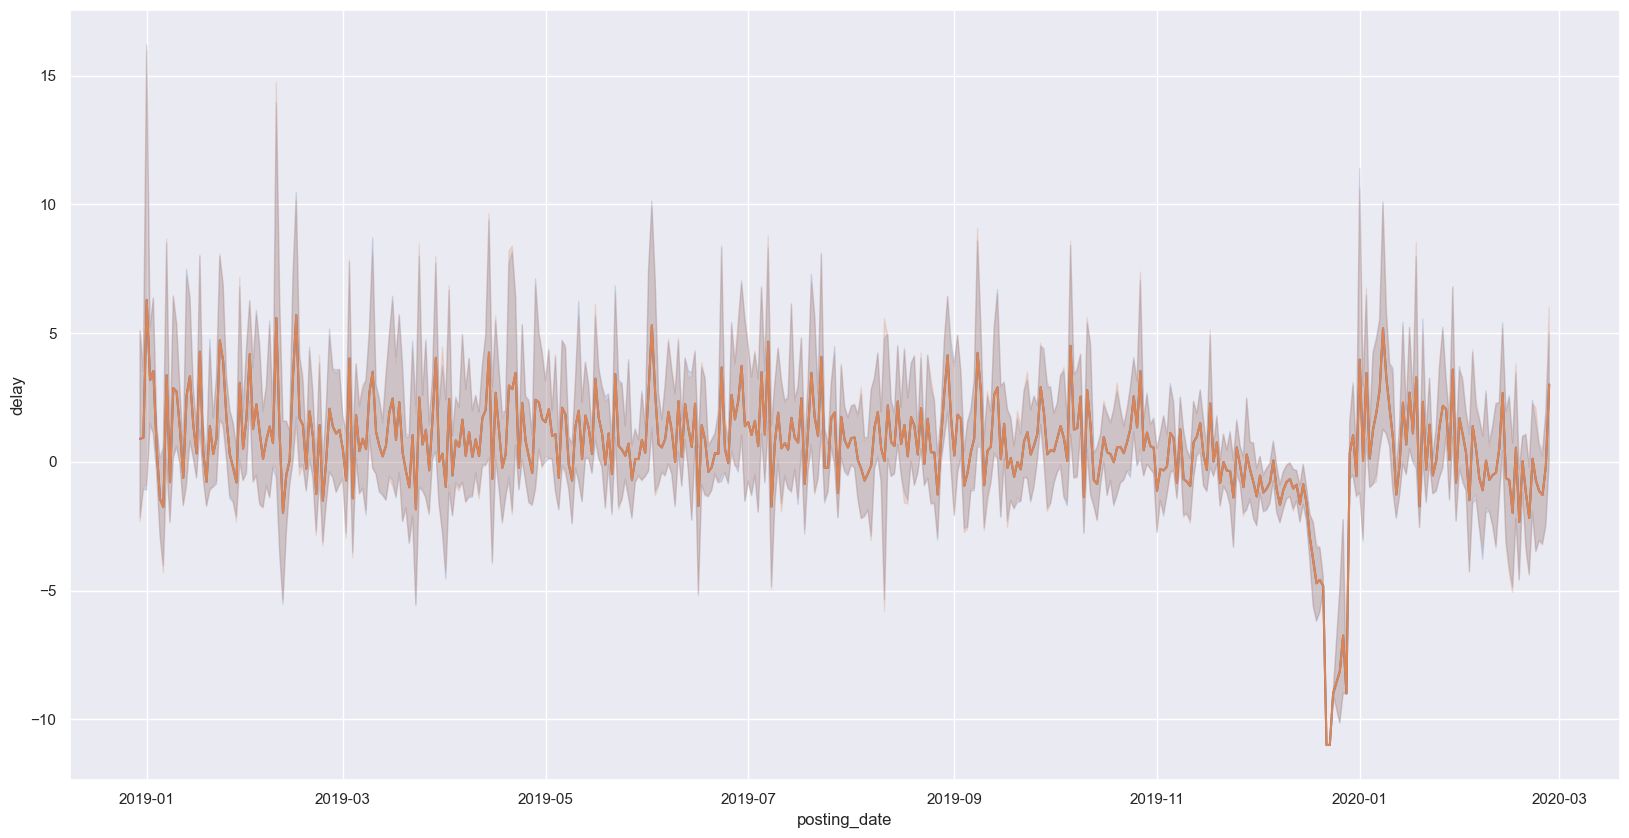

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x='posting_date',y='delay',data=df)
sns.lineplot(x='posting_date',y='delay',data=df)

posting date vs delay graph to get the understanding about around which posting date there where most delay

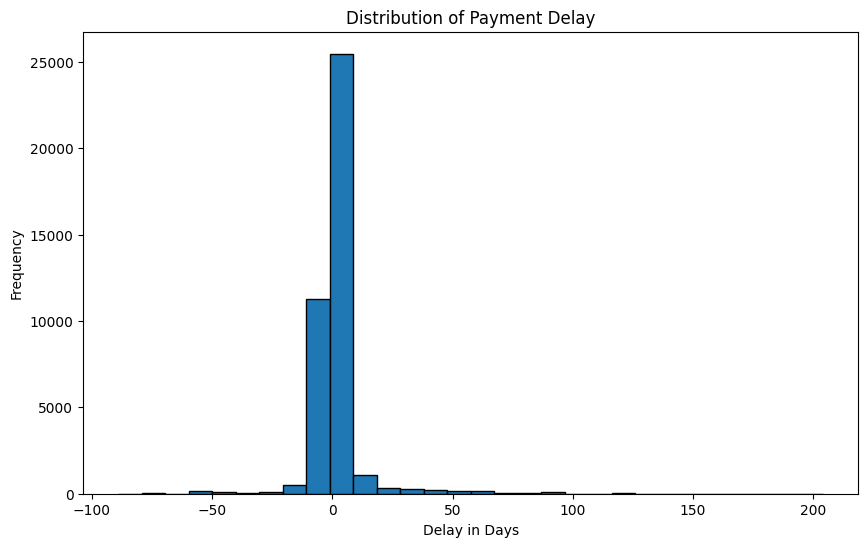

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.hist(df['delay'], bins=30, edgecolor='k')
plt.xlabel('Delay in Days')
plt.ylabel('Frequency')
plt.title('Distribution of Payment Delay')
plt.show()

Histogram of delay_date to Find what number of delay are most frequenct among customers

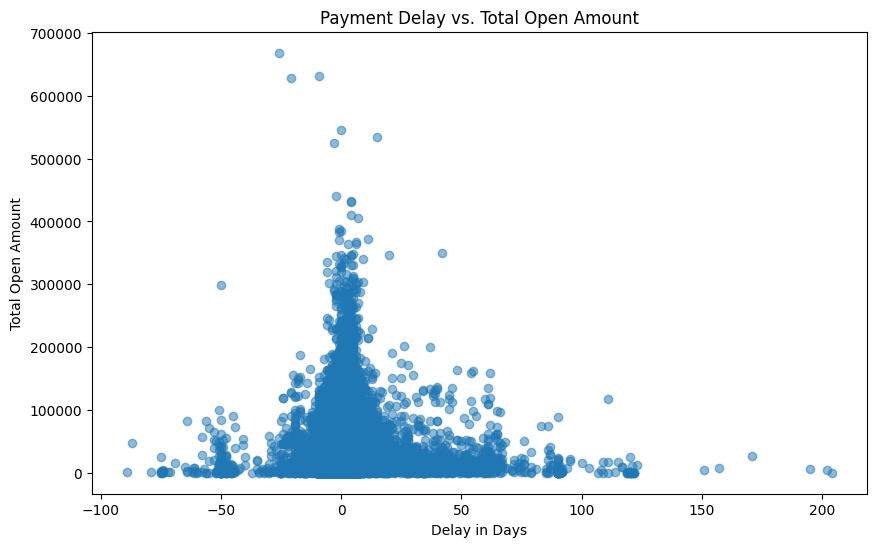

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['delay'], df['total_open_amount'], alpha=0.5)
plt.xlabel('Delay in Days')
plt.ylabel('Total Open Amount')
plt.title('Payment Delay vs. Total Open Amount')
plt.show()

Scatter plot of delay vs. total_open_amount

### Feature engineering and Selection

In [19]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,baseline_create_date,cust_payment_terms,invoice_id,Date,Month,Year,quarter,dayofweek,final_invoice_currency,delay
10052,U013,0140103335,PARAM corp,2019-01-23,2019.0,1.991819e+09,2018-12-30,2018-12-26,20181230,2019-01-29,...,2018-12-30,NAVE,1.991819e+09,30,12,2018,4,6,13760.55,-6
20128,U013,0100009932,SYSCO IN trust,2019-02-28,2019.0,1.991820e+09,2018-12-30,2018-12-28,20181230,2019-01-29,...,2018-12-30,NAVE,1.991820e+09,30,12,2018,4,6,28225.48,30
2392,U001,0200769623,WAL-MAR corporation,2019-01-09,2019.0,1.928535e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,2018-12-30,NAH4,1.928535e+09,30,12,2018,4,6,47642.00,-5
29464,U001,0200706844,WINC systems,2019-01-15,2019.0,1.928539e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,2018-12-30,NAA8,1.928539e+09,30,12,2018,4,6,57640.90,1
29571,U001,0200726979,BJ'S llc,2019-01-15,2019.0,1.928538e+09,2018-12-30,2018-12-29,20181230,2019-01-14,...,2018-12-30,NAA8,1.928538e+09,30,12,2018,4,6,79.88,1


### Feature Engnieering and Selection

Log transformation of the 'total_open_amount' column

In [20]:
df['total_open_amount_log'] = np.log1p(df['total_open_amount'])

C:\Users\yash.ra\AppData\Local\Temp\ipykernel_12908\1253227539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_open_amount_log'] = np.log1p(df['total_open_amount'])


Label encoding on the Categorical Columns

In [21]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].astype(str)
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

C:\Users\yash.ra\AppData\Local\Temp\ipykernel_12908\2579514696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_columns] = df[categorical_columns].astype(str)
C:\Users\yash.ra\AppData\Local\Temp\ipykernel_12908\2579514696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = label_encoder.fit_transform(df[column])
C:\Users\yash.ra\AppData\Local\Temp\ipykernel_12908\2579514696.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [22]:
df=df.drop(['area_business'],axis=1)

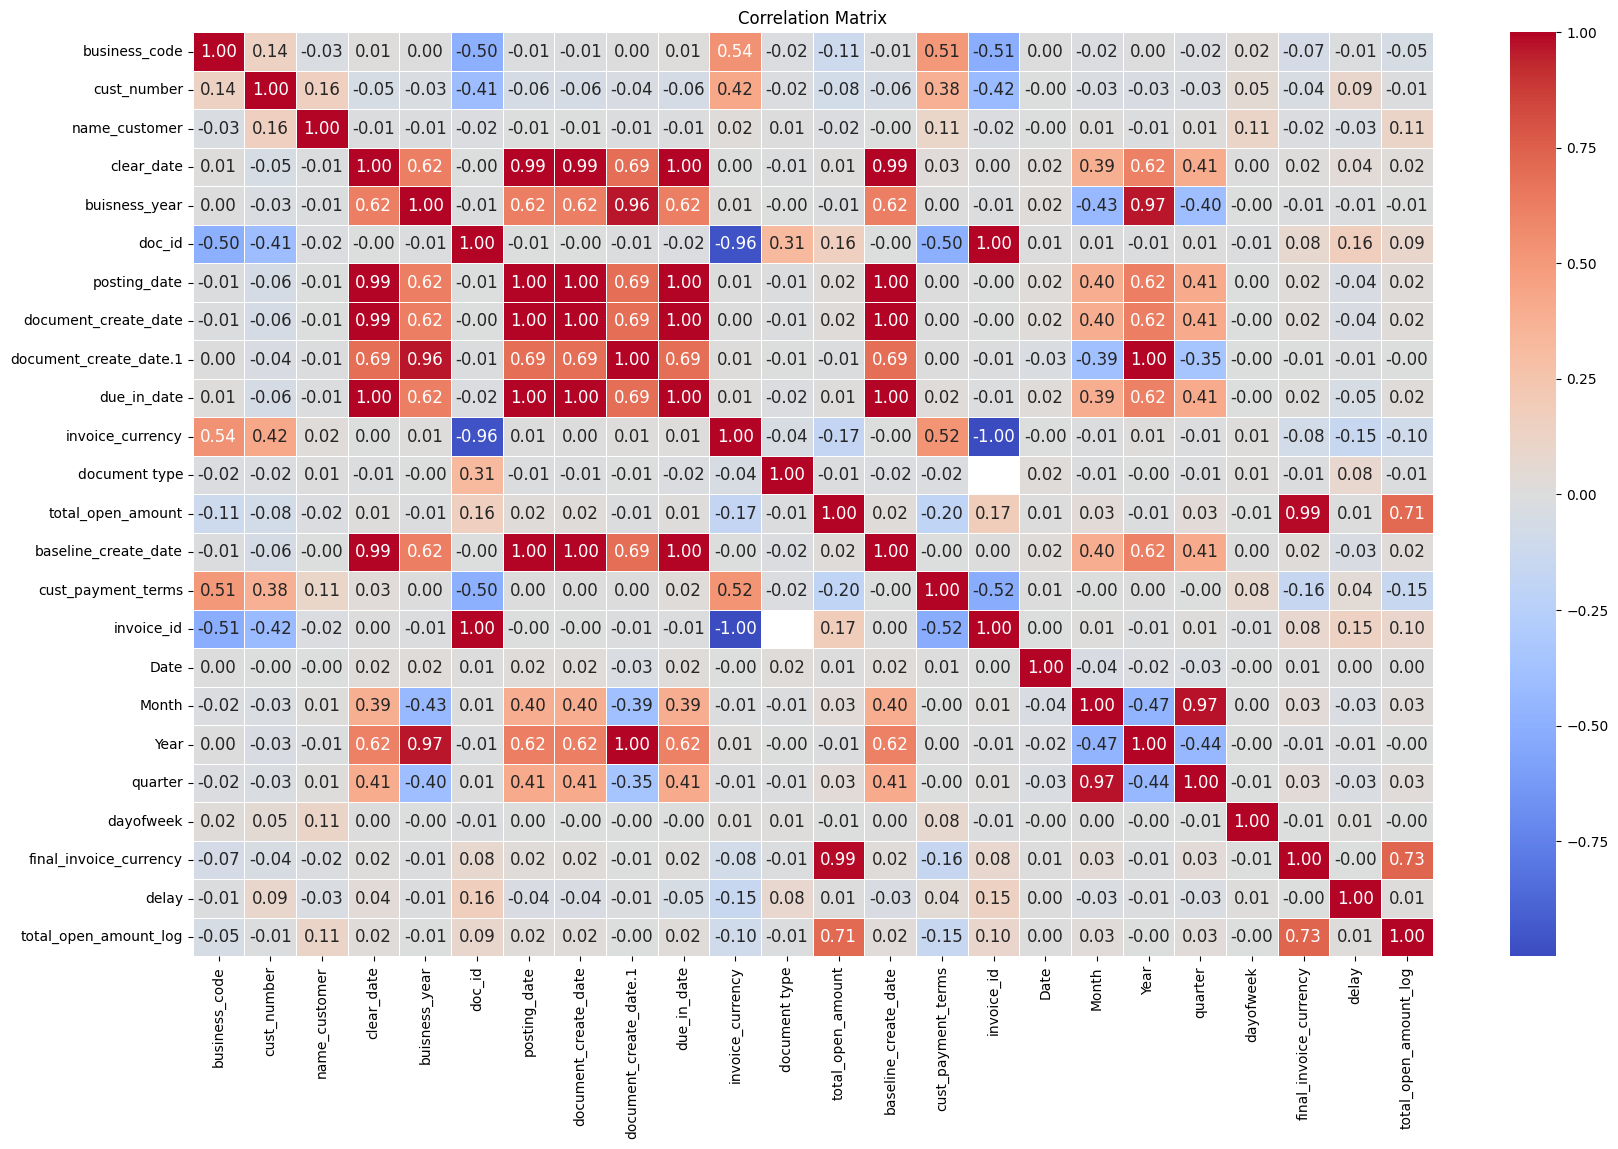

In [23]:
correlation_matrix=df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

In [24]:
correlation=df.corr()['delay'].abs()
selected_columns=correlation[correlation>0.12].index
selected_columns

Index(['doc_id', 'invoice_currency', 'invoice_id', 'delay'], dtype='object')

Finding the most Correlated Features

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 10052 to 11541
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  int32         
 1   cust_number             40000 non-null  int32         
 2   name_customer           40000 non-null  int32         
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  float64       
 5   doc_id                  40000 non-null  float64       
 6   posting_date            40000 non-null  datetime64[ns]
 7   document_create_date    40000 non-null  datetime64[ns]
 8   document_create_date.1  40000 non-null  int64         
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  int32         
 11  document type           40000 non-null  int32         
 12  total_open_amount       40000 non-null  float64

In [26]:
avg_delay=df.groupby(by=['name_customer'])['delay'].mean(numeric_only=False)


In [27]:
df.loc[:,'avg_delay']=df['name_customer'].map(avg_delay)
df[['name_customer','avg_delay']].head(10)

,name_customer,avg_delay
10052,2618,-3.000000
20128,3467,15.500000
2392,3766,-2.547213
29464,3839,-0.400000
29571,400,1.543478
21601,3770,-2.399510
3800,1263,0.777778
46672,3765,-2.704082
49532,397,1.516129
10999,3767,-2.199765


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 10052 to 11541
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  int32         
 1   cust_number             40000 non-null  int32         
 2   name_customer           40000 non-null  int32         
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  float64       
 5   doc_id                  40000 non-null  float64       
 6   posting_date            40000 non-null  datetime64[ns]
 7   document_create_date    40000 non-null  datetime64[ns]
 8   document_create_date.1  40000 non-null  int64         
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  int32         
 11  document type           40000 non-null  int32         
 12  total_open_amount       40000 non-null  float64

In [29]:
df=df.drop(columns=['invoice_id'])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 10052 to 11541
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           40000 non-null  int32         
 1   cust_number             40000 non-null  int32         
 2   name_customer           40000 non-null  int32         
 3   clear_date              40000 non-null  datetime64[ns]
 4   buisness_year           40000 non-null  float64       
 5   doc_id                  40000 non-null  float64       
 6   posting_date            40000 non-null  datetime64[ns]
 7   document_create_date    40000 non-null  datetime64[ns]
 8   document_create_date.1  40000 non-null  int64         
 9   due_in_date             40000 non-null  datetime64[ns]
 10  invoice_currency        40000 non-null  int32         
 11  document type           40000 non-null  int32         
 12  total_open_amount       40000 non-null  float64

### Model Training

In [31]:
# New Columns are made by group previous existing columns
df['is_late_payment']=(df['delay']>0).astype(int)
df['Days_Before_Due'] = (df['due_in_date'] - df['posting_date']).dt.days
df['posting_date']=pd.to_datetime(df['posting_date'])
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'])
df['document_create_date']=pd.to_datetime(df['document_create_date']).astype('int64')
df['clear_date']=pd.to_datetime(df['clear_date']).astype('int64')
df['due_in_doc']=(df['document_create_date.1']-df['posting_date']).dt.days.astype('int64')
df['quarter_month'] = df['quarter'].astype(str) + '-' + df['Month'].astype(str)
df['due_in_date']=pd.to_datetime(df['due_in_date']).astype('int64')
df['mean_total_amount_by_year'] = df.groupby('buisness_year')['total_open_amount'].mean()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 10052 to 11541
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   business_code              40000 non-null  int32         
 1   cust_number                40000 non-null  int32         
 2   name_customer              40000 non-null  int32         
 3   clear_date                 40000 non-null  int64         
 4   buisness_year              40000 non-null  float64       
 5   doc_id                     40000 non-null  float64       
 6   posting_date               40000 non-null  datetime64[ns]
 7   document_create_date       40000 non-null  int64         
 8   document_create_date.1     40000 non-null  datetime64[ns]
 9   due_in_date                40000 non-null  int64         
 10  invoice_currency           40000 non-null  int32         
 11  document type              40000 non-null  int32         
 12  total

In [33]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,dayofweek,final_invoice_currency,delay,total_open_amount_log,avg_delay,is_late_payment,Days_Before_Due,due_in_doc,quarter_month,mean_total_amount_by_year
10052,5,339,2618,1548201600000000000,2019.0,1.991819e+09,2018-12-30,1545782400000000000,1970-01-01 00:00:00.020181230,1548720000000000000,...,6,13760.55,-6,9.529634,-3.000000,0,30,-17895,4-12,NaN
20128,5,33,3467,1551312000000000000,2019.0,1.991820e+09,2018-12-30,1545955200000000000,1970-01-01 00:00:00.020181230,1548720000000000000,...,6,28225.48,30,10.248016,15.500000,1,30,-17895,4-12,NaN
2392,1,850,3766,1546992000000000000,2019.0,1.928535e+09,2018-12-30,1546041600000000000,1970-01-01 00:00:00.020181230,1547424000000000000,...,6,47642.00,-5,10.771491,-2.547213,0,15,-17895,4-12,NaN
29464,1,707,3839,1547510400000000000,2019.0,1.928539e+09,2018-12-30,1546041600000000000,1970-01-01 00:00:00.020181230,1547424000000000000,...,6,57640.90,1,10.962005,-0.400000,1,15,-17895,4-12,NaN
29571,1,751,400,1547510400000000000,2019.0,1.928538e+09,2018-12-30,1546041600000000000,1970-01-01 00:00:00.020181230,1547424000000000000,...,6,79.88,1,4.392967,1.543478,1,15,-17895,4-12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42248,1,711,2812,1583971200000000000,2020.0,1.930576e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583971200000000000,...,2,90643.88,0,11.414705,0.903226,0,15,-18318,1-2,NaN
4700,1,854,3811,1583971200000000000,2020.0,1.930577e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583971200000000000,...,2,14880.14,0,9.607850,0.571429,0,15,-18318,1-2,NaN
17190,1,850,3771,1583798400000000000,2020.0,1.930576e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583971200000000000,...,2,5126.33,-2,8.542340,-2.302350,0,15,-18318,1-2,NaN
49046,1,683,3400,1583280000000000000,2020.0,1.930576e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583539200000000000,...,2,56296.00,-3,10.938397,-3.000000,0,10,-18318,1-2,NaN


In [34]:
df.head

<bound method NDFrame.head of        business_code  cust_number  name_customer           clear_date  \
10052              5          339           2618  1548201600000000000   
20128              5           33           3467  1551312000000000000   
2392               1          850           3766  1546992000000000000   
29464              1          707           3839  1547510400000000000   
29571              1          751            400  1547510400000000000   
...              ...          ...            ...                  ...   
42248              1          711           2812  1583971200000000000   
4700               1          854           3811  1583971200000000000   
17190              1          850           3771  1583798400000000000   
49046              1          683           3400  1583280000000000000   
11541              1          602           2650  1588896000000000000   

       buisness_year        doc_id posting_date  document_create_date  \
10052         2019.0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 10052 to 11541
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   business_code              40000 non-null  int32         
 1   cust_number                40000 non-null  int32         
 2   name_customer              40000 non-null  int32         
 3   clear_date                 40000 non-null  int64         
 4   buisness_year              40000 non-null  float64       
 5   doc_id                     40000 non-null  float64       
 6   posting_date               40000 non-null  datetime64[ns]
 7   document_create_date       40000 non-null  int64         
 8   document_create_date.1     40000 non-null  datetime64[ns]
 9   due_in_date                40000 non-null  int64         
 10  invoice_currency           40000 non-null  int32         
 11  document type              40000 non-null  int32         
 12  total

In [36]:
df['cust_payment_terms']

10052    59
20128    59
2392     35
29464    21
29571    21
         ..
42248    21
4700     21
17190    35
49046    11
11541    31
Name: cust_payment_terms, Length: 40000, dtype: int32

In [37]:
from sklearn.model_selection import train_test_split
X=df[['cust_payment_terms','buisness_year','document_create_date','cust_number','is_late_payment','due_in_date']]
Y=df['delay']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=300)

# Linear Regression Model

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
model = LinearRegression()

model.fit(X_train, y_train)

y_pred_LR_test = model.predict(X_test)
y_pred_LR_train = model.predict(X_train)
mse_test_LR = mean_squared_error(y_test, y_pred_LR_test)
mse_train_LR=mean_squared_error(y_train, y_pred_LR_train)
rmse_test_LR = np.sqrt(mse_test_LR)
rmse_train_LR = np.sqrt(mse_train_LR)
mae_test_LR = mean_absolute_error(y_test, y_pred_LR_test)
mae_train_LR = mean_absolute_error(y_train, y_pred_LR_train)

# Calculate the R-squared value
r2_test_LR = r2_score(y_test, y_pred_LR_test)

r2_train_LR = r2_score(y_train, y_pred_LR_train)


print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_LR)
print("Root Mean Squared Error (RMSE):", rmse_test_LR)
print("Mean Absolute Error (MAE):", mae_test_LR)
print("R-squared (R2) Score:", r2_test_LR)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_LR)
print("Root Mean Squared Error (RMSE):", rmse_test_LR)
print("Mean Absolute Error (MAE):", mae_test_LR)
print("R-squared (R2) Score:", r2_test_LR)

Training Set:
Mean Squared Error (MSE): 110.58034082695735
Root Mean Squared Error (RMSE): 10.481950273364731
Mean Absolute Error (MAE): 5.166901969088616
R-squared (R2) Score: 0.05258422043643307

Testing Set:
Mean Squared Error (MSE): 109.87128153329097
Root Mean Squared Error (RMSE): 10.481950273364731
Mean Absolute Error (MAE): 5.166901969088616
R-squared (R2) Score: 0.05258422043643307


# XGBOOST MODEL

In [39]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)

dtest = xgb.DMatrix(X_test)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'  
}

model_XGB = xgb.train(params, dtrain)

y_pred_train_XB = model_XGB.predict(dtrain)
y_pred_test_XB = model_XGB.predict(dtest)

mse_train_XB = mean_squared_error(y_train, y_pred_train_XB)
mse_test_XB = mean_squared_error(y_test, y_pred_test_XB)


rmse_train_XB = np.sqrt(mse_train_XB)
rmse_test_XB = np.sqrt(mse_test_XB)

mae_train_XB = mean_absolute_error(y_train, y_pred_train_XB)
mae_test_XB = mean_absolute_error(y_test, y_pred_test_XB)


r2_train_XB = r2_score(y_train, y_pred_train_XB)
r2_test_XB = r2_score(y_test, y_pred_test_XB)

print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_XB)
print("Root Mean Squared Error (RMSE):", rmse_train_XB)
print("Mean Absolute Error (MAE):", mae_train_XB)
print("R-squared (R2) Score:", r2_train_XB)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_XB)
print("Root Mean Squared Error (RMSE):", rmse_test_XB)
print("Mean Absolute Error (MAE):", mae_test_XB)
print("R-squared (R2) Score:", r2_test_XB)

Training Set:
Mean Squared Error (MSE): 44.44764288455548
Root Mean Squared Error (RMSE): 6.66690654535936
Mean Absolute Error (MAE): 2.6192617871025576
R-squared (R2) Score: 0.6222402643414121

Testing Set:
Mean Squared Error (MSE): 51.84223257409416
Root Mean Squared Error (RMSE): 7.2001550381984245
Mean Absolute Error (MAE): 2.656928001753986
R-squared (R2) Score: 0.5529664485289636


# ADA BOOST

In [40]:
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor()

model.fit(X_train, y_train)
y_pred_train_AB = model.predict(X_train)
y_pred_test_AB = model.predict(X_test)
mse_train_AB = mean_squared_error(y_train, y_pred_train_AB)
mse_test_AB = mean_squared_error(y_test, y_pred_test_AB)
rmse_train_AB = np.sqrt(mse_train_AB)
rmse_test_AB = np.sqrt(mse_test_AB)
mae_train_AB = mean_absolute_error(y_train, y_pred_train_AB)
mae_test_AB = mean_absolute_error(y_test, y_pred_test_AB)

r2_train_AB = r2_score(y_train, y_pred_train_AB)
r2_test_AB = r2_score(y_test, y_pred_test_AB)

print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_AB)
print("Root Mean Squared Error (RMSE):", rmse_train_AB)
print("Mean Absolute Error (MAE):", mae_train_AB)
print("R-squared (R2) Score:", r2_train_AB)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_AB)
print("Root Mean Squared Error (RMSE):", rmse_test_AB)
print("Mean Absolute Error (MAE):", mae_test_AB)
print("R-squared (R2) Score:", r2_test_AB)

Training Set:
Mean Squared Error (MSE): 622.6227616513788
Root Mean Squared Error (RMSE): 24.952409936745166
Mean Absolute Error (MAE): 17.616404454651295
R-squared (R2) Score: -4.291659907980677

Testing Set:
Mean Squared Error (MSE): 631.397733148147
Root Mean Squared Error (RMSE): 25.127628880341
Mean Absolute Error (MAE): 17.765431954100592
R-squared (R2) Score: -4.444518050733461


# Decision Tree Model

In [41]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_train_DT = model.predict(X_train)
y_pred_test_DT = model.predict(X_test)
mse_train_DT = mean_squared_error(y_train, y_pred_train_DT)
mse_test_DT = mean_squared_error(y_test, y_pred_test_DT)

# Calculate the root mean squared error (RMSE) for both sets
rmse_train_DT = np.sqrt(mse_train_DT)
rmse_test_DT = np.sqrt(mse_test_DT)

# Calculate the mean absolute error (MAE) for both sets
mae_train_DT = mean_absolute_error(y_train, y_pred_train_DT)
mae_test_DT = mean_absolute_error(y_test, y_pred_test_DT)

# Calculate the R-squared value for both sets
r2_train_DT = r2_score(y_train, y_pred_train_DT)
r2_test_DT = r2_score(y_test, y_pred_test_DT)

print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_DT)
print("Root Mean Squared Error (RMSE):", rmse_train_DT)
print("Mean Absolute Error (MAE):", mae_train_DT)
print("R-squared (R2) Score:", r2_train_DT)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_DT)
print("Root Mean Squared Error (RMSE):", rmse_test_DT)
print("Mean Absolute Error (MAE):", mae_test_DT)
print("R-squared (R2) Score:", r2_test_DT)

Training Set:
Mean Squared Error (MSE): 3.0216539693270863
Root Mean Squared Error (RMSE): 1.7382905307591956
Mean Absolute Error (MAE): 0.21975185509024223
R-squared (R2) Score: 0.9743190160236517

Testing Set:
Mean Squared Error (MSE): 76.21702088595659
Root Mean Squared Error (RMSE): 8.730236015478424
Mean Absolute Error (MAE): 2.1828958541458543
R-squared (R2) Score: 0.3427835986713065


# Random Forest Model

In [42]:
cqddd

NameError: name 'cqddd' is not defined

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred_train_RF = model.predict(X_train)
y_pred_test_RF = model.predict(X_test)
mse_train_RF = mean_squared_error(y_train, y_pred_train_RF)
mse_test_RF = mean_squared_error(y_test, y_pred_test_RF)
rmse_train_RF = np.sqrt(mse_train_RF)
rmse_test_RF = np.sqrt(mse_test_RF)
mae_train_RF = mean_absolute_error(y_train, y_pred_train_RF)
mae_test_RF = mean_absolute_error(y_test, y_pred_test_RF)
r2_train_RF = r2_score(y_train, y_pred_train_RF)
r2_test_RF = r2_score(y_test, y_pred_test_RF)

print("Training Set:")
print("Mean Squared Error (MSE):", mse_train_RF)
print("Root Mean Squared Error (RMSE):", rmse_train_RF)
print("Mean Absolute Error (MAE):", mae_train_RF)
print("R-squared (R2) Score:", r2_train_RF)

print("\nTesting Set:")
print("Mean Squared Error (MSE):", mse_test_RF)
print("Root Mean Squared Error (RMSE):", rmse_test_RF)
print("Mean Absolute Error (MAE):", mae_test_RF)
print("R-squared (R2) Score:", r2_test_RF)

# Randomized Search On XGBOOST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb_model = xgb.XGBRegressor()

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
}

random_search = RandomizedSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
random_search.fit(X_train, y_train)

best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)

mae_train_xg = mean_absolute_error(y_train, y_train_pred)
mse_train_xg = mean_squared_error(y_train, y_train_pred)
rmse_train_xg = mean_squared_error(y_train, y_train_pred, squared=False)
r2_train_xg = r2_score(y_train, y_train_pred)

y_test_pred = best_model.predict(X_test)

mae_test_xg = mean_absolute_error(y_test, y_test_pred)
mse_test_xg = mean_squared_error(y_test, y_test_pred)
rmse_test_xg = mean_squared_error(y_test, y_test_pred, squared=False)
r2_test_xg = r2_score(y_test, y_test_pred)

print("Best Hyperparameters:", best_params)
print()
print("Training Data:")
print("Mean Absolute Error (MAE):", mae_train_xg)
print("Mean Squared Error (MSE):", mse_train_xg)
print("Root Mean Squared Error (RMSE):", rmse_train_xg)
print("R-squared (R2):", r2_train_xg)
print()

print("Test Data:")
print("Mean Absolute Error (MAE):", mae_test_xg)
print("Mean Squared Error (MSE):", mse_test_xg)
print("Root Mean Squared Error (RMSE):", rmse_test_xg)
print("R-squared (R2):",r2_test_xg)

# Grid Search On XGBOOST

In [43]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

xgboost = xgb.XGBRegressor()
param_grid = {
    'learning_rate': [0.10, 0.50, 1.00],
    'max_depth': [4, 5, 8],
    'n_estimators': [5, 10, 20]
}

grid_search = GridSearchCV(xgboost, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

mse_train_GV = mean_squared_error(y_train, y_train_pred)
mse_test_GV = mean_squared_error(y_test, y_test_pred)

rmse_train_GV = np.sqrt(mse_train_GV)
rmse_test_GV = np.sqrt(mse_test_GV)

r2_train_GV = r2_score(y_train, y_train_pred)
r2_test_GV = r2_score(y_test, y_test_pred)

print("XGBoost Model")
print(f"MSE (Train): {mse_train_GV}")
print(f"MSE (Test): {mse_test_GV}")
print(f"RMSE (Train): {rmse_train_GV}")
print(f"RMSE (Test): {rmse_test_GV}")
print(f"R-squared (Train): {r2_train_GV}")
print(f"R-squared (Test): {r2_test_GV}")

XGBoost Model
MSE (Train): 25.35479978186172
MSE (Test): 50.81060900273334
RMSE (Train): 5.035354980720001
RMSE (Test): 7.128156073118302
R-squared (Train): 0.7845100022930429
R-squared (Test): 0.5618620983879381


Selected the Basic XGBOOST model as the accuracy was most with least deviation from training data and further save it to perform prediction 

In [45]:
import pickle
with open('xgb_model2.pkl', 'wb') as file:
    pickle.dump(model_XGB, file)

Making Aging Bucket 
● 0-15 days 
● 16-30 days 
● 31-45 days 
● 46-60 days 
● Greater than 60 days
And further performing prediction

In [46]:
import pandas as pd
import pickle 

with open('xgb_model.pkl', 'rb') as file:
    best_xgboost_model = pickle.load(file)

x_dmatrix = xgb.DMatrix(X)
predicted_payment_date = best_xgboost_model.predict(x_dmatrix)


predicted_aging_buckets = []
for value in predicted_payment_date:
    if value <= 15:
        predicted_aging_buckets.append('0-15 days')
    elif value <= 30:
        predicted_aging_buckets.append('16-30 days')
    elif value <= 45:
        predicted_aging_buckets.append('31-45 days')
    elif value <= 60:
        predicted_aging_buckets.append('46-60 days')
    else:
        predicted_aging_buckets.append('Greater than 60 days')

df['Payment_Date_Predict'] = pd.to_datetime(predicted_payment_date) 
df['Aging_Bucket_Predict'] = predicted_aging_buckets
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,delay,total_open_amount_log,avg_delay,is_late_payment,Days_Before_Due,due_in_doc,quarter_month,mean_total_amount_by_year,Payment_Date_Predict,Aging_Bucket_Predict
10052,5,339,2618,1548201600000000000,2019.0,1.991819e+09,2018-12-30,1545782400000000000,1970-01-01 00:00:00.020181230,1548720000000000000,...,-6,9.529634,-3.000000,0,30,-17895,4-12,NaN,1969-12-31 23:59:59.999999995,0-15 days
20128,5,33,3467,1551312000000000000,2019.0,1.991820e+09,2018-12-30,1545955200000000000,1970-01-01 00:00:00.020181230,1548720000000000000,...,30,10.248016,15.500000,1,30,-17895,4-12,NaN,1970-01-01 00:00:00.000000006,0-15 days
2392,1,850,3766,1546992000000000000,2019.0,1.928535e+09,2018-12-30,1546041600000000000,1970-01-01 00:00:00.020181230,1547424000000000000,...,-5,10.771491,-2.547213,0,15,-17895,4-12,NaN,1969-12-31 23:59:59.999999997,0-15 days
29464,1,707,3839,1547510400000000000,2019.0,1.928539e+09,2018-12-30,1546041600000000000,1970-01-01 00:00:00.020181230,1547424000000000000,...,1,10.962005,-0.400000,1,15,-17895,4-12,NaN,1970-01-01 00:00:00.000000003,0-15 days
29571,1,751,400,1547510400000000000,2019.0,1.928538e+09,2018-12-30,1546041600000000000,1970-01-01 00:00:00.020181230,1547424000000000000,...,1,4.392967,1.543478,1,15,-17895,4-12,NaN,1970-01-01 00:00:00.000000003,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42248,1,711,2812,1583971200000000000,2020.0,1.930576e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583971200000000000,...,0,11.414705,0.903226,0,15,-18318,1-2,NaN,1970-01-01 00:00:00.000000000,0-15 days
4700,1,854,3811,1583971200000000000,2020.0,1.930577e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583971200000000000,...,0,9.607850,0.571429,0,15,-18318,1-2,NaN,1970-01-01 00:00:00.000000000,0-15 days
17190,1,850,3771,1583798400000000000,2020.0,1.930576e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583971200000000000,...,-2,8.542340,-2.302350,0,15,-18318,1-2,NaN,1969-12-31 23:59:59.999999997,0-15 days
49046,1,683,3400,1583280000000000000,2020.0,1.930576e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583539200000000000,...,-3,10.938397,-3.000000,0,10,-18318,1-2,NaN,1969-12-31 23:59:59.999999998,0-15 days


In [47]:
df['Aging_Bucket_Predict'].value_counts()

Aging_Bucket_Predict
0-15 days               39174
31-45 days                436
46-60 days                250
16-30 days                128
Greater than 60 days       12
Name: count, dtype: int64

In [48]:
df['Payment_Date_Predict'].nunique()

102

In [49]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,delay,total_open_amount_log,avg_delay,is_late_payment,Days_Before_Due,due_in_doc,quarter_month,mean_total_amount_by_year,Payment_Date_Predict,Aging_Bucket_Predict
10052,5,339,2618,1548201600000000000,2019.0,1.991819e+09,2018-12-30,1545782400000000000,1970-01-01 00:00:00.020181230,1548720000000000000,...,-6,9.529634,-3.000000,0,30,-17895,4-12,NaN,1969-12-31 23:59:59.999999995,0-15 days
20128,5,33,3467,1551312000000000000,2019.0,1.991820e+09,2018-12-30,1545955200000000000,1970-01-01 00:00:00.020181230,1548720000000000000,...,30,10.248016,15.500000,1,30,-17895,4-12,NaN,1970-01-01 00:00:00.000000006,0-15 days
2392,1,850,3766,1546992000000000000,2019.0,1.928535e+09,2018-12-30,1546041600000000000,1970-01-01 00:00:00.020181230,1547424000000000000,...,-5,10.771491,-2.547213,0,15,-17895,4-12,NaN,1969-12-31 23:59:59.999999997,0-15 days
29464,1,707,3839,1547510400000000000,2019.0,1.928539e+09,2018-12-30,1546041600000000000,1970-01-01 00:00:00.020181230,1547424000000000000,...,1,10.962005,-0.400000,1,15,-17895,4-12,NaN,1970-01-01 00:00:00.000000003,0-15 days
29571,1,751,400,1547510400000000000,2019.0,1.928538e+09,2018-12-30,1546041600000000000,1970-01-01 00:00:00.020181230,1547424000000000000,...,1,4.392967,1.543478,1,15,-17895,4-12,NaN,1970-01-01 00:00:00.000000003,0-15 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42248,1,711,2812,1583971200000000000,2020.0,1.930576e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583971200000000000,...,0,11.414705,0.903226,0,15,-18318,1-2,NaN,1970-01-01 00:00:00.000000000,0-15 days
4700,1,854,3811,1583971200000000000,2020.0,1.930577e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583971200000000000,...,0,9.607850,0.571429,0,15,-18318,1-2,NaN,1970-01-01 00:00:00.000000000,0-15 days
17190,1,850,3771,1583798400000000000,2020.0,1.930576e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583971200000000000,...,-2,8.542340,-2.302350,0,15,-18318,1-2,NaN,1969-12-31 23:59:59.999999997,0-15 days
49046,1,683,3400,1583280000000000000,2020.0,1.930576e+09,2020-02-26,1582761600000000000,1970-01-01 00:00:00.020200226,1583539200000000000,...,-3,10.938397,-3.000000,0,10,-18318,1-2,NaN,1969-12-31 23:59:59.999999998,0-15 days


In [50]:
df['cust_payment_terms']

10052    59
20128    59
2392     35
29464    21
29571    21
         ..
42248    21
4700     21
17190    35
49046    11
11541    31
Name: cust_payment_terms, Length: 40000, dtype: int32

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 10052 to 11541
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   business_code              40000 non-null  int32         
 1   cust_number                40000 non-null  int32         
 2   name_customer              40000 non-null  int32         
 3   clear_date                 40000 non-null  int64         
 4   buisness_year              40000 non-null  float64       
 5   doc_id                     40000 non-null  float64       
 6   posting_date               40000 non-null  datetime64[ns]
 7   document_create_date       40000 non-null  int64         
 8   document_create_date.1     40000 non-null  datetime64[ns]
 9   due_in_date                40000 non-null  int64         
 10  invoice_currency           40000 non-null  int32         
 11  document type              40000 non-null  int32         
 12  total